<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# Шуліка Олександр КМ-83. Курсова робота на тему "Дослідження збіжності партан-методу найшвидшого спуску".

## Зміст

* Зміст
* Постановка задачі
* Теоретичні відомості
  * Функція Розенброка
  * Партан-метод найшвидшого спуску
  * Чисельне обчислення похідних
  * Критерії закінчення
* Реалізація методу
  * Імпорт необхідних бібліотек
  * Оголошення усіх необхідних функцій
  * Виконання розрахунків
* Відображення результатів
  * Порівняння методів для обчислення похідної
  * Порівняння методів одновимірного пошуку
  * Порівняння критерієв закінчення
* Висновки
* Список використаної літератури



## Постановка задачі

Дослідити збіжність партан-методу найшвидшого спуску на функції Розенброка. Перевірити як на збіжність методу впливають наступні фактори:

* Стратегія обчислення похідної
* Величина кроку при чисельному обчислені похідних
* Метод одновимірного пошуку (метод золотого перетину або ДСК-Пауелла)
* Точність одновимірного пошуку
* Критерію закінчення

## Теоретичні відомості

### Функція Розенброка

$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$

### Партан-метод найвидшого спуску

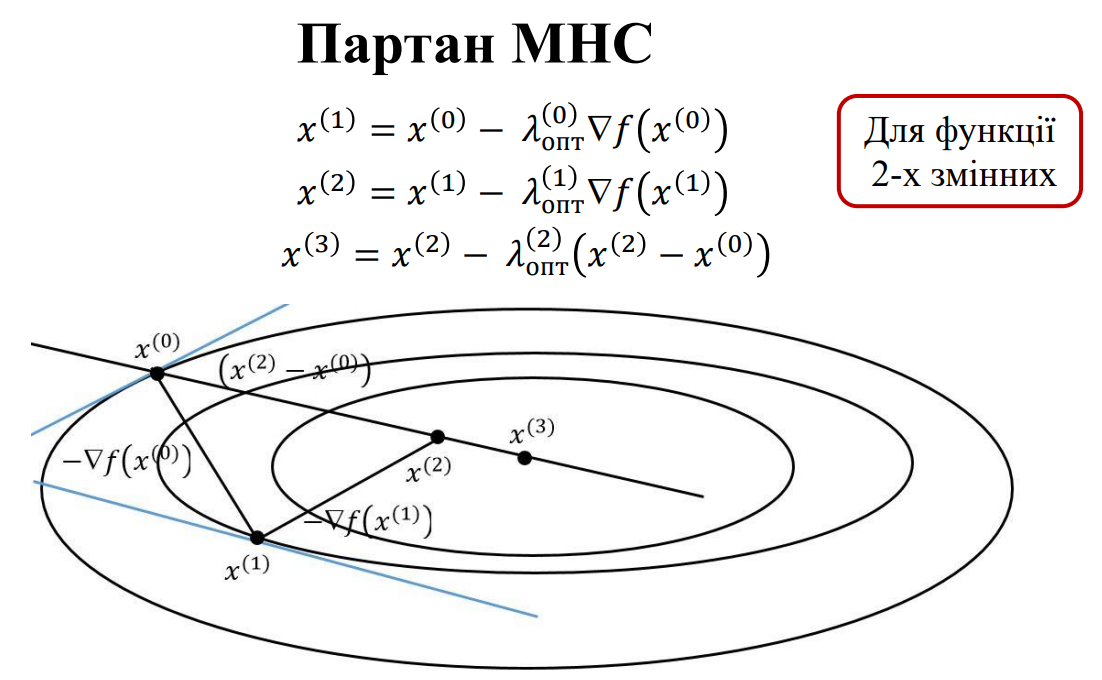

### Чисельне обчислення похідних

Формула правої кінцевої різниці для обчислення першої похідної:

$$f'(x) = \frac{f(x+h) - f(x)}{h}$$

Формула лівої кінцевої різниці для обчислення першої похідної:

$$f'(x) = \frac{f(x) - f(x - h)}{h}$$

Формула для обчислення першої похідної за методом центральних різниць:

$$f'(x) = \frac{f(x+h) - f(x - h)}{2h}$$

### Критерії закічнення

1. $$\begin{cases}
\frac{ | f(x^{k+1}) - f(x^k) | } { | f(x^k) | } <= \varepsilon  \\ 
\frac{ ||x^{k+1} - x^k || } { ||x^k|| } <= \varepsilon
\end{cases}$$

2. $$ || \nabla f(x^k) || <= \varepsilon $$

## Реалізація методу

### Імпорт необхідних бібліотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from matplotlib import style
style.use('seaborn')

### Оголошення усіх необхідних функцій

In [ ]:
calls_count = 0

def func(x):
    global calls_count
    calls_count += 1
    
    x1, x2 = np.reshape(x, -1)

    return (1 - x1**2)**2 + 100 * (x2 - x1**2)**2

In [ ]:
def right_grad(x, h):
    dx1 = [x[0] + h, x[1]]
    df1 = (func(dx1) - func(x)) / h
    dx2 = [x[0], x[1] + h]
    df2 = (func(dx2) - func(x)) / h

    return np.asarray([df1, df2])


def left_grad(x, h):
    dx1 = [x[0] - h, x[1]]
    df1 = (func(x) - func(dx1)) / h
    dx2 = [x[0], x[1] - h]
    df2 = (func(x) - func(dx2)) / h

    return np.asarray([df1, df2])


def central_grad(x, h):
    left_x1 = [x[0] - h, x[1]]
    right_x1 = [x[0] + h, x[1]]
    df1 = (func(right_x1) - func(left_x1)) / 2 / h
    left_x2 = [x[0], x[1] - h]
    right_x2 = [x[0], x[1] + h]
    df2 = (func(right_x2) - func(left_x2)) / 2 / h

    return np.asarray([df1, df2])

In [ ]:
def sven(x, s, lambd=0):
    calls_before = calls_count

    lambds = [lambd]
    vals = [func(x)]

    delta =  0.1 * np.linalg.norm(x) / np.linalg.norm(s)
    
    left = func(x + (lambd - delta) * s)
    right = func(x + (lambd + delta) * s)
  
    if left > vals[0] and right > vals[0]:
      return lambd - delta, lambd + delta
    
    if left < right:
        sign = -1
        lambd = lambd - delta
        lambds.append(lambd)
        vals.append(left)
    else:
        sign = 1
        lambd = lambd + delta
        lambds.append(lambd)
        vals.append(right)
    
    i = 1
    done = False
    while not done:
        lambd += sign * delta * 2 ** i
        val = func(x + lambd * s)
        
        if val >= vals[-1]:
            done = True

        lambds.append(lambd)
        vals.append(val)
        
        i += 1

    potential_min = vals[-2]
    
    lambd = (lambds[-2] + lambds[-1]) * 0.5
    val = func(x + lambd * s)

    lambds.append(lambd)
    vals.append(val)

    #fig = plt.figure(figsize=(16, 7))
    #plt.plot(lambds, vals, 'bo')

    #print("Number of function calls -", calls_count - calls_before)
    
    if val < potential_min:
        return lambds[-2], lambds[-3]
    elif val > potential_min:
        return lambds[-1], lambds[-4]
    else:
        return lambds[-1], lambds[-3]


In [ ]:
def golden_ratio(interval, x, s, epsilon):
    calls_before = calls_count

    a = min(interval)
    b = max(interval)
    done = False
    
    i = 0

    while not done:
        i += 1
        
        L = abs(a - b)
        done = True if L < epsilon else False
        l1 = a + 0.382 * L
        l2 = a + 0.618 * L
        
        l1_val = func(x + l1 * s)
        l2_val = func(x + l2 * s)
        
        if l1_val < l2_val:
            b = l2
            potential_min = l1
        elif l2_val < l1_val:
            a = l1
            potential_min = l2

    #print("Iterations -", i)
    #print("Number of function calls -", calls_count - calls_before)
    
    return potential_min

In [ ]:
def dsk_powell(interval, x, s, epsilon):
    calls_before = calls_count
    
    i = 1
    done = False

    l1 = min(interval)
    l3 = max(interval)
    l2 = (l1 + l3) * 0.5
    
    l1_val = func(x + l1 * s)
    l2_val = func(x + l2 * s)
    l3_val = func(x + l3 * s)
    
    la = l2 + (l2 - l1) * (l1_val - l3_val) / 2 / (l1_val - 2 * l2_val + l3_val)
    la_val = func(x + la * s)
    
    if abs(l2_val - la_val) <= epsilon and abs(l2 - la) <= epsilon:
        done = True

    while not done:
        i += 1

        left = 1 if la < l2 else 0
        min_idx = np.argmin([l2_val, la_val])
        if min_idx:
            if left:
                l3 = l2
                l3_val = l2_val
            else:
                l1 = l2
                l1_val = l2_val
            l2 = la
            l2_val = la_val
        else:
            if left:
                l1 = la
                l1_val = la_val
            else:
                l3 = la
                l3_val = la_val
        
        a1 = (l2_val - l1_val) / (l2 - l1)
        a2 = ((l3_val - l1_val) / (l3 - l1) - (l2_val - l1_val) / (l2 - l1)) / (l2 - l1)
        
        la = (l1 + l2) * 0.5 - a1 / (2 * a2)
        la_val = func(x + la * s)
        
        if abs(la - l2) <= epsilon and abs(la_val - l2_val) <= epsilon:
            done = True

    #print("Iterations -", i)
    #print("Number of function calls -", calls_count - calls_before)
    
    return la

In [ ]:
def grad_descent(x0, h, grad_func, one_dim_func, end_eps=0.01, epsilon=0.01, end_case=0):
    global calls_count
    calls_count = 0

    done = False

    grads = list()
    xs = [x0]
    grad_val = grad_func(x0, h)
    grads.append(grad_val)
    s = grad_val
    x = x0
    i = 1
    while not done:
        interval = sven(x, s)
        lambd = one_dim_func(interval, x, s, epsilon)
  
        x = x + lambd * s
        xs.append(x)
        grad_val = grad_func(x, h)
        grads.append(grad_val)
  
        if not i % 3:
            s = xs[-1] - xs[-3]
        else:
            s = grad_val
        i += 1
  
        if i > 150:
          return False, None
  
        if end_case:
          first = np.linalg.norm(xs[-1] - xs[-2]) / np.linalg.norm(xs[-2]) <= end_eps
          xk_val = func(xs[-2])
          second = np.abs(func(xs[-1]) - xk_val) / np.abs(xk_val) <= end_eps
          done = first and second
        else:
          done = np.linalg.norm(grad_val) <= end_eps
    return x, xs

### Виконання розрахунків

In [ ]:
hs = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
hs_result = list()

for h in hs:
  iter_list = list()
  point, _ = grad_descent(np.array([3., 5.]), h, right_grad, golden_ratio, end_case=0)
  if point is not False:
    iter_list.append(calls_count)
  else:
    iter_list.append('Не зійшовся')

  point, _ = grad_descent(np.array([3., 5.]), h, left_grad, golden_ratio, end_case=0)
  if point is not False:
    iter_list.append(calls_count)
  else:
    iter_list.append('Не зійшовся')

  point, _ = grad_descent(np.array([3., 5.]), h, central_grad, golden_ratio, end_case=0)
  if point is not False:
    iter_list.append(calls_count)
  else:
    iter_list.append('Не зійшовся')

  hs_result.append(iter_list.copy())

In [ ]:
eps = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
eps_result = list()

for t in eps:
  iter_list = list()

  point, _ = grad_descent(np.array([3., 5.]), 1e-6, right_grad, dsk_powell, epsilon=t, end_case=0)
  if point is not False:
    iter_list.append(calls_count)
  else:
    iter_list.append('Не зійшовся')

  point, _ = grad_descent(np.array([3., 5.]), 1e-6, right_grad, golden_ratio, epsilon=t, end_case=0)
  if point is not False:
    iter_list.append(calls_count)
  else:
    iter_list.append('Не зійшовся')

  eps_result.append(iter_list.copy())

In [ ]:
eps = [1e-4, 1e-5]
second_eps_result = list()

for t in eps:
  iter_list = list()

  point, _ = grad_descent(np.array([-3., -7.]), 1e-6, right_grad, dsk_powell, epsilon=t, end_case=0)
  if point is not False:
    iter_list.append(calls_count)
  else:
    iter_list.append('Не зійшовся')

  point, _ = grad_descent(np.array([-3., -7.]), 1e-6, right_grad, golden_ratio, epsilon=t, end_case=0)
  if point is not False:
    iter_list.append(calls_count)
  else:
    iter_list.append('Не зійшовся')

  second_eps_result.append(iter_list.copy())

In [ ]:
end_eps = [0.01, 0.001]
end_eps_result = list()

for ep in end_eps:
  iter_list = list()

  for i in range(2):

    point, _ = grad_descent(np.array([3., 5.]), 1e-6, right_grad, golden_ratio, end_eps=ep, epsilon=1e-5, end_case=i)
    iter_list.append(point)

  end_eps_result.append(iter_list.copy())

## Відображення результатів

### Порівняння методів для обчислення похідної

Виконаємо мінімізацію функції Розенброка з точки (3, 5) партан МНС з методом золотого перетину для одновимірного пошуку оптимального кроку. У якості критерія закінчення оберемо другий критерій з $\varepsilon = 0.01$. При цьому перевіримо збіжність методу для усіх трьох методів обчислення похідної, а також для різних кроків при обчисленні похідної. Побудуємо таблицю, яка відображатиме скільки разів була викликана функція для заданого набору параметрів:

In [ ]:
pd.DataFrame(hs_result, index=hs, columns=['Правий', 'Лівий', 'Центральний'])

,Правий,Лівий,Центральний
1.000000e-02,Не зійшовся,Не зійшовся,Не зійшовся
1.000000e-03,Не зійшовся,Не зійшовся,1147
1.000000e-04,Не зійшовся,Не зійшовся,799
1.000000e-05,781,1053,1441
1.000000e-06,945,813,807
1.000000e-07,801,1196,803
1.000000e-08,1271,1251,1437


Отже, можемо побачити, що при використанні методу центральних різниць для  обчислення похідної партан МНС збігається навіть при доволі великих значеннях кроку для обчислення похідної.

Тим не менш, задовольнити встановлений критерій закінчення за наймешу кількість викликів функції вдалось при використанні методу правих кінцевих різниць для обчислення похідної (при $ h = 0.00001 $ ).

### Порівняння методів одновимірного пошуку

Тепер виконаємо порівняння методів одновимірного пошуку оптимальної довжини кроку. Знову виконаємо мінімізацію функції Розенброка з точки (3, 5). Для знаходження похідної скористаємось методом правих кінцевих різниць з $h = 10^{-6}$. Критерій закінчення знову другий з $\varepsilon = 0.01$. Розрахунки проводитимо для різних значень точності одновимірного пошуку. До таблиці заноситимо кількість викликів цільової функції:

In [ ]:
pd.DataFrame(eps_result, index=eps, columns=['ДСК-Пауелла', 'Золотого перетину'])

,ДСК-Пауелла,Золотого перетину
0.10000,Не зійшовся,Не зійшовся
0.01000,Не зійшовся,945
0.00100,635,1132
0.00010,676,1834
0.00001,502,748


Менша кількість викликів функції у методі ДСК-Пауелла у порівнянні з методом золотого перетину є очевидним і очікуваним результатом, оскільки це метод, що використовує квадратичну апроксимацію. Що дійно є неочікуваним і цікавим спостереженням - це факт того, що при найбільшій точності одновимірного пошуку - $ 10^{-5} $ відбулась найменша кількість викликів цільової функції для обох методів. Це може бути випадковим збігом обставин і виконуватись лише для точки (3, 5). Щоб переконатись у цьому виконаємо мінімізацію функції з точки (-3, -7):


In [ ]:
pd.DataFrame(second_eps_result, index=eps, columns=['ДСК-Пауелла', 'Золотого перетину'])

,ДСК-Пауелла,Золотого перетину
0.00010,768,869
0.00001,470,798


Можемо побачити, що після зміни початкової точки, все одно зберіглась тенденція того, що для забезпення точності одновимірного пошуку $10^{-5}$ виконується менше викликів цільової функції, ніж при точності $10^{-4}$. У цього може бути наступне пояснення:

Якби ми проводили одномірний пошук невелику кількість разів, наприклад, від 1 до 5, то менша вимога до точності призвела б до меншої кількості викликів функції. Проте "на дистанції" у нас відбувається накопичення похибки і у кінці процессу мінімізації виконуються додаткові виклики функції для забезпечення критерію закінчення.

Тим не менш, головний висновок з цього підпункту наступний - метод ДСК-Пауелла є більш вдалим вибором, ніж метод золотого перетину, оскільки він виконує виклик цільової функції меншу кількість разів, забезпечуючи таку ж саму точність.

### Порівняння критерієв закінчення

Перевіримо, у яких точках закінчує роботу алгоритм в залежності від критерію закінчення та значення $\varepsilon$. Почнемо у точці (3, 5), метод обчислення похідної - метод правих різниць, величина $ h -  10^{-6} $, метод одновимірного пошуку - метод золотого перетину, точність одновимірного пошуку - $ 10^{-5}$. Отримаємо:

In [ ]:
pd.DataFrame(end_eps_result, index=end_eps, columns=['Другий критерій', 'Перший критерій'])

,Другий критерій,Перший критерій
0.010,"[1.0022165511248342, 1.004472455977493]","[2.2545948385205374, 5.11937712316559]"
0.001,"[1.0000021672907973, 1.000004374817873]","[1.0000021621416921, 1.0000043734450297]"


Знаючи, що глобальний мінімум функції знаходиться у точці (1, 1), можна заявити, що при використанні першого критерію та значенню $\varepsilon = 0.01$ нам не вдалось мінімізувати функцію. Обгрунтувати це можна тим, що при використання першого критерію, ми порівнюємо значення функцій на попередньому і поточному кроці, а враховуючи ландшафт функції Розенброка, швидкість спуску сильно зменшується в околі точки мінімума:

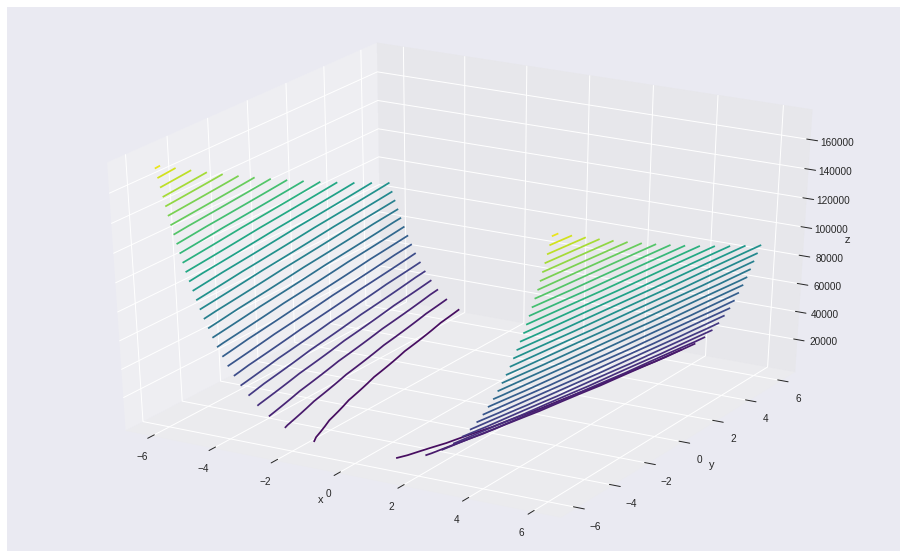

In [ ]:
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

def f(x, y):
  return (1 - x)**2 + 100 * (y - x**2)**2

Z = f(X, Y)

ax.contour3D(X, Y, Z, 30, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

plt.show()

Тому для цієї функції надійніше використовувати другий критерій закінчення при невисоких вимогах до точності результату. Якщо ж ми збільшимо результуючу точність шляхом зменшення величини $\varepsilon$, то обидва критерії даватимуть доволі близькі за значенням точки.

## Висновки

Отже, у цій роботі ми дослідили збіжність партан-методу найшвидшого спуску на прикладі мінімізації функції Розенброка і перевірили як зміна параметрів методу впливає на швидкість його збіжності.

Ми переконались на практиці у наступному:

* Для обчислення оптимальної величини кроку краще використовувати метод ДСК-Пауелла, оскільки цей метод у порівнянні з методом золотого перетину виконує менше обчислень цільової функції, а отже і зменшує час роботи алгоритму вцілому.

* Саме для цієї функції використання методу правих кінцевих різниць призвело до зменшення середньої кількості обчислень цільової функції, проте метод центральних різниць забезпечував збіжність методу для більшого діапазону значень величини $h$. Тому, на мою думку, варто спочатку використовувати метод правих кінцев різниць, а у випадку розбіжності методу перемикатись на використання методу центральних різниць.

* Необхідно уважно ставитись до вибору критерію закінчення і краще по черзі скористатись обома критеріями, після чого порівняти отримані точки і значення цільової функції у них.

## Список використаної літератури

1.	Д. Химмельблау Прикладное нелинейное программирование – М:Мир, 1975. 
2.	Реклейтис Г., Рейвиндран А., Рэгсдел К. Оптимизация в технике. Книга 1. – М:Мир, 1986. 
3.	Т. С. Ладогубець. Методи оптимізації- електронний конспект – Київ: НТУУ «КПІ», 2016.
